In [53]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 23 23:03:55 2023

@author: sagar
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from decimal import Decimal

import matplotlib
matplotlib.rcParams["figure.dpi"]=100

In [54]:
def straightline(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

def linefit(x,y):
    x=np.array(x)
    parameters,pcov = curve_fit(straightline, x,y, maxfev=100000) # your data x, y to fit
    line=straightline(x,*parameters)    


    string=f"Fit: y=mx+c ; with m={Decimal(str(parameters[0])).quantize(Decimal('1.00'))}, c={Decimal(str(parameters[1])).quantize(Decimal('1.00'))} "         
    return(line,parameters)               


In [55]:
def parabola(x, A, B, C): # this is your 'parabola' y=f(x)
    return A*x**2 + B*x + C

def parabola_fit(x,y):
    # Perform a parabolic fit
    parameters = np.polyfit(x, y, 2)

    # Create a function from the coefficients
    # Create a function from the coefficients
    parabolic_fit = np.poly1d(parameters)
    fit_y=parabolic_fit(x)

    return(fit_y,parameters)

In [56]:
def gaussian(omega,E0,omega0,sigma):
    E=E0*np.exp(-(omega-omega0)**2/(2*sigma**2))
    return(E)

In [57]:
def phase_factor(omega,omega0,phi0,b1,b2,b3,b4):
    delta=omega-omega0
    phi=phi0+b1*delta+b2*delta**2+b3*delta**3+b4*delta**4
    e_i_phi=np.exp(1j*phi)
    return phi,e_i_phi

In [58]:
class pulse:
    def __init__(self,E0,omega0,sigma,phi0,b1,b2,b3,b4):
        self.E0=E0
        self.omega0=omega0
        self.sigma=sigma
        self.phi0=phi0
        self.b1=b1
        self.b2=b2
        self.b3=b3
        self.b4=b4
        pulse.omega=np.linspace(2100,2620,9601)
        pulse.phase=np.zeros(len(pulse.omega))
        self.d_omega=abs(np.diff(pulse.omega)[0])
        self.pulse_profile()
        self.spectral_intensity()
        
    def pulse_profile(self):
        E_0=gaussian(pulse.omega, self.E0, self.omega0, self.sigma)
        phase,e_i_phase=phase_factor(pulse.omega, self.omega0, self.phi0, self.b1, self.b2, self.b3, self.b4)
        E=E_0*e_i_phase
        pulse.phase=phase
        return(E)
    
    def spectral_intensity(self):
        E=self.pulse_profile()
        I=(abs(E))**2
        return I

In [59]:
def superposition(pulse1,pulse2,time_delay):
    phase_lag = np.exp(1j * pulse1.omega * time_delay)
    combined_E=pulse2.pulse_profile()*phase_lag+pulse1.pulse_profile()
    combined_I=(abs(combined_E))**2
    return combined_E,combined_I

In [60]:
def FDI(pulse1,pulse2,time_delay):
    
    combined_E,combined_I=superposition(pulse1, pulse2, time_delay)
    minw=2217
    maxw=2513
    
    fig, ax1 = plt.subplots()
    ax1.plot(pulse1.omega,pulse1.pulse_profile().real,label="E vs freq",lw=1)
    ax1.plot(pulse1.omega,abs(pulse1.pulse_profile()),'k--',label="E field envelope",lw=1)
    ax1.plot(pulse1.omega,pulse1.spectral_intensity(),label="spectral intensity",lw=1)
    ax1.set_title("Pulse 1: \n"+r"$\tilde E(\omega)=$"+r"$\tilde E_0e^{-\frac{(\omega-\omega_0)^2}{2\sigma^2}}\times\exp[i(\phi_0+b_1\Delta\omega+b_2\Delta\omega^2+b_3\Delta\omega^3+b_4\Delta\omega^4)]$"+"\n"+r"$\tilde E_0: $"+f"{pulse1.E0}; "+r"$\omega_0$: "+f"{pulse1.omega0}; "+r"$\sigma$: "+f"{pulse1.sigma}; "+r"$\phi_0$: "+f"{pulse1.phi0}; "+r"$b_1$: "+f"{pulse1.b1}; "+r"$b_2$: "+f"{pulse1.b2}; "+r"$b_3$: "+f"{pulse1.b3}; "+r"$b_4$: "+f"{pulse1.b4}" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    ax1.legend()
    ax1.set_xlabel(r"$\omega$ (rad/ps)")
    ax1.set_ylabel(r"$Re(E(\omega))\ \ &\ \ I(\omega)$")
    ax1.set_xlim(minw,maxw)
    #plt.grid(color='black', linestyle='-', linewidth=1)
    
    bx1=ax1.twinx()
    bx1.plot(pulse1.omega,pulse1.phase,'g-.',label="Phase",lw=1)
    bx1.set_ylabel(r"$\phi(\omega)$ (rad)")
    bx1.legend(loc="upper left")
    bx1.set_xlim(minw,maxw)
    
    plt.show()
    
    
    fig, ax2 = plt.subplots()
    ax2.plot(pulse2.omega,pulse2.pulse_profile().real,label="E vs freq",lw=1)
    ax2.plot(pulse2.omega,abs(pulse2.pulse_profile()),'k--',label="E field envelope",lw=1)
    ax2.plot(pulse2.omega,pulse2.spectral_intensity(),label="spectral intensity",lw=1)
    ax2.set_title("Pulse 2: \n"+r"$\tilde E(\omega)=$"+r"$\tilde E_0e^{-\frac{(\omega-\omega_0)^2}{2\sigma^2}}\times\exp[i(\phi_0+b_1\Delta\omega+b_2\Delta\omega^2+b_3\Delta\omega^3+b_4\Delta\omega^4)]$"+"\n"+r"$\tilde E_0: $"+f"{pulse2.E0}; "+r"$\omega_0$: "+f"{pulse2.omega0}; "+r"$\sigma$: "+f"{pulse2.sigma}; "+r"$\phi_0$: "+f"{pulse2.phi0}; "+r"$b_1$: "+f"{pulse2.b1}; "+r"$b_2$: "+f"{pulse2.b2}; "+r"$b_3$: "+f"{pulse2.b3}; "+r"$b_4$: "+f"{pulse2.b4}" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    ax2.legend()
    ax2.set_xlabel(r"$\omega$ (rad/ps)")
    ax2.set_ylabel(r"$Re(E(\omega))\ \ &\ \ I(\omega)$")
    ax2.set_xlim(minw,maxw)
    #plt.grid(color='black', linestyle='-', linewidth=1)
    
    bx2=ax2.twinx()
    bx2.plot(pulse1.omega,pulse1.phase,'g-.',label="Phase",lw=1)
    bx2.set_ylabel(r"$\phi(\omega)$ (rad)")
    bx2.legend(loc="upper left")
    bx2.set_xlim(minw,maxw)
    
    plt.show()


    fig, ax3 = plt.subplots()
    ax3.plot(pulse2.omega,combined_E.real,label="Superposed E",lw=1)
    ax3.plot(pulse1.omega,abs(combined_E),'k-',label="E field envelope",lw=1)
    ax3.plot(pulse2.omega,combined_I,label="FDI signal",lw=1)
    ax3.set_title("Spectral domain interference"+f"   (delay: {time_delay} ps)" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    ax3.legend()
    ax3.set_xlabel(r"$\omega$ (rad/ps)")
    ax3.set_ylabel(r"$Re(E(\omega))\ \ &\ \ I(\omega)$")
    #plt.grid(color='black', linestyle='-', linewidth=1)
    ax3.set_xlim(minw,maxw)
    plt.show()
    
    
    plt.plot(pulse1.omega,pulse1.spectral_intensity(),'r-',label="Pulse 1",lw=1)
    plt.plot(pulse2.omega,pulse2.spectral_intensity(),'b-',label="Pulse 2",lw=1)
    plt.plot(pulse2.omega,combined_I,'k-',label="FDI signal",lw=1)
    plt.title("Combined plot of spectrum"+"\n"+f"Delay: {time_delay} ps" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.legend()
    plt.xlabel(r"$\omega$ (rad/ps)")
    plt.ylabel(r"$I(\omega)$")
    plt.xlim(minw,maxw)
    #plt.grid(color='black', linestyle='-', linewidth=1)
    plt.show()
    
    return combined_E,combined_I

In [61]:
def info_table(pulse1,pulse2):
    pulse1_info=r"$\tilde E_0: $"+f"{pulse1.E0}\n"+r"$\omega_0$: "+f"{pulse1.omega0}\n"+r"$\sigma_{\omega}$: "+f"{pulse1.sigma}\n"+r"$\phi_0$: "+f"{pulse1.phi0}\n"+r"$b_1$: "+f"{pulse1.b1}\n"+r"$b_2$: "+f"{pulse1.b2}\n"+r"$b_3$: "+f"{pulse1.b3}\n"+r"$b_4$: "+f"{pulse1.b4}"
    pulse2_info=r"$\tilde E_0: $"+f"{pulse2.E0}\n"+r"$\omega_0$: "+f"{pulse2.omega0}\n"+r"$\sigma_{\omega}$: "+f"{pulse2.sigma}\n"+r"$\phi_0$: "+f"{pulse2.phi0}\n"+r"$b_1$: "+f"{pulse2.b1}\n"+r"$b_2$: "+f"{pulse2.b2}\n"+r"$b_3$: "+f"{pulse2.b3}\n"+r"$b_4$: "+f"{pulse2.b4}"
    pulse_info=r"$\tilde E(\omega)=$"+r"$\tilde E_0e^{-\frac{(\omega-\omega_0)^2}{2\sigma^2}}\times\exp[i(\phi_0+b_1\Delta\omega+b_2\Delta\omega^2+b_3\Delta\omega^3+b_4\Delta\omega^4)]$"

    plt.figure()
    plt.plot()
    plt.figtext(0,1,"Pulse 1"+"\n__________", fontsize=15, color="Blue")
    plt.figtext(0, 0.5,pulse1_info, fontsize=12, color='red')
    plt.figtext(0.5,1,"Pulse 2"+"\n__________", fontsize=15, color="Blue")
    plt.figtext(0.5, 0.5,pulse2_info, fontsize=12, color='red')
    plt.figtext(0.15,0.7,f"<-------Delay: ------->\n           {time_delay} ps",fontsize=15,color="magenta")
    plt.figtext(0,0.3,pulse_info,fontsize=12,color="green")
    plt.axis("off")
    plt.show()


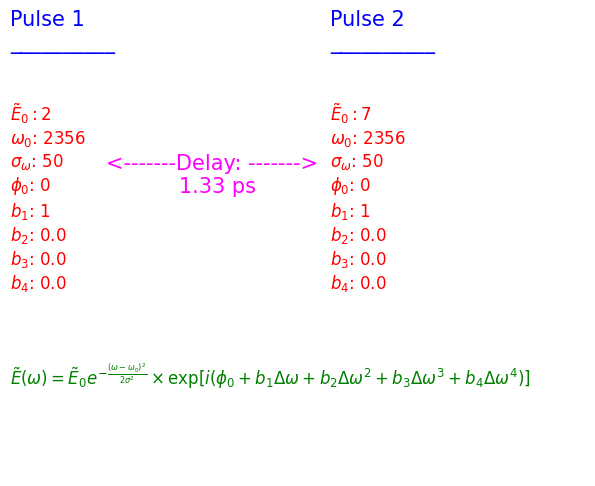

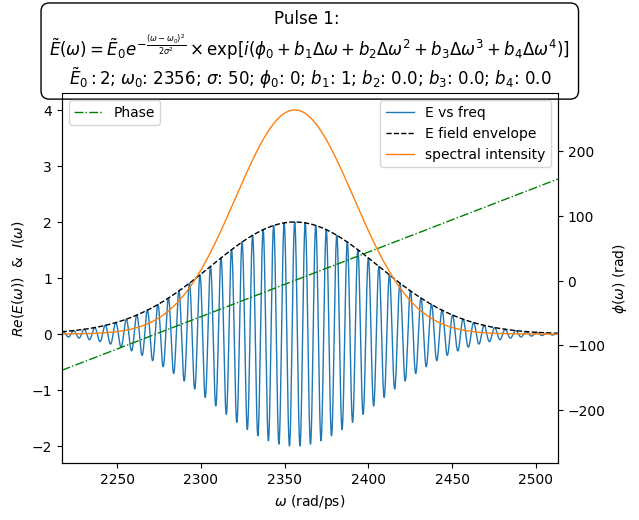

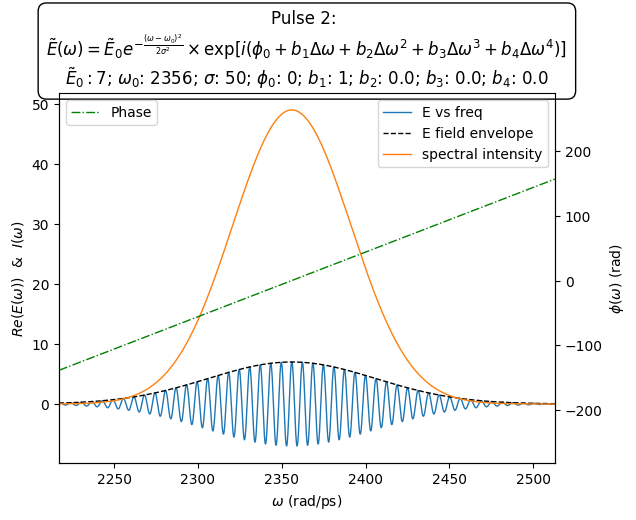

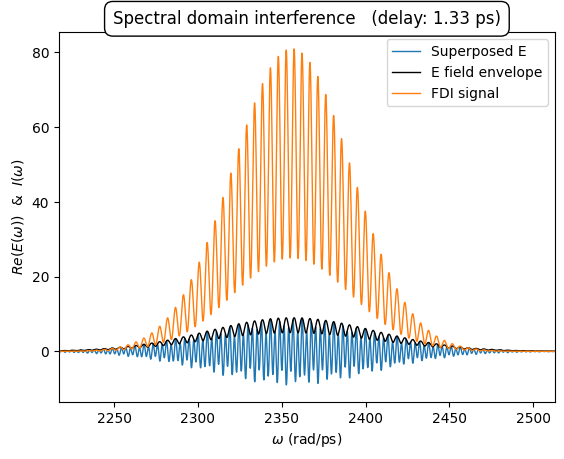

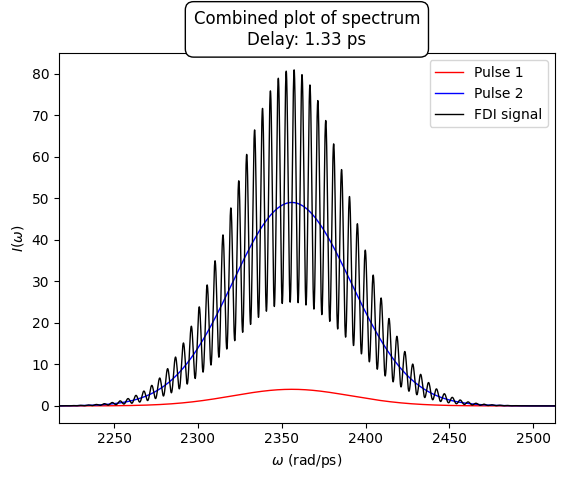

In [62]:
c=3e5       # in nm/ps

#   Define the required pulses   #

w1=800        # in nm
w2=800        # in nm

# The pulse central frequensy will be calculated from the central  wavelength.
# for 400 nm light omega0 ~ 4720 rad/ps
# sigma is the std of the Gaussian of the spectral profile. 
# All the units of sigma, b1, b2, ... are in angular frequency (omega) term.
# sigma ~ (1-10) rad/ps;  b1 ~ 0.5  

pulse1=pulse(E0=2, omega0=int(2*np.pi*c/w1), sigma=50, phi0=0, b1=1, b2=0.0, b3=0.00, b4=0.0)
pulse2=pulse(E0=7, omega0=int(2*np.pi*c/w2), sigma=50, phi0=0, b1=pulse1.b1, b2=0.0, b3=0.00, b4=0.0)

d_omega=pulse1.d_omega

time_delay = 1.33     #in ps


info_table(pulse1,pulse2)
combined_E,combined_I=FDI(pulse1,pulse2,time_delay)

Do the FFT of I($\omega$) to get I(t).

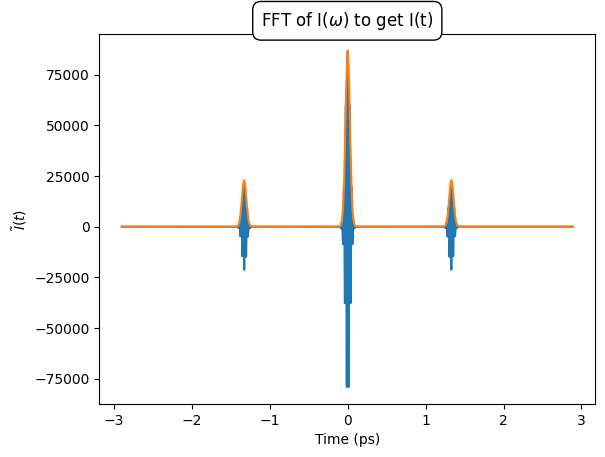

In [63]:
I_t  = np.fft.fftshift(np.fft.fft(combined_I))
time = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(I_t), (d_omega)))

omegarange=len(pulse1.omega)//40
minw=len(pulse1.omega)//2-omegarange
maxw=len(pulse1.omega)//2+omegarange

plt.plot(time[minw:maxw],I_t[minw:maxw])
plt.plot(time[minw:maxw],abs(I_t[minw:maxw]))
plt.title(r"FFT of I($\omega$) to get I(t)" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Time (ps)")
plt.ylabel(r"$\tilde{I}(t)$")
#plt.xlim(-2*time_delay,2*time_delay)
plt.show()

Masking I(t) to get the right side peak of the full FFT 
And plotting the right side peak.

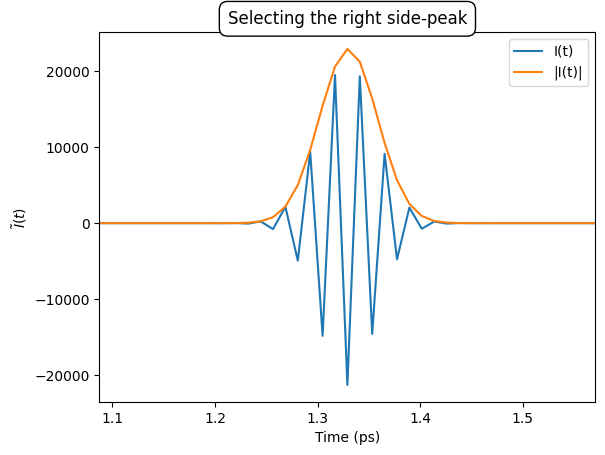

In [64]:
# select the right side peak and plot
# masking the array to get the right side peak:

def mask_array(my_array, *ranges):
    # Create a mask for the specified ranges
    mask = np.zeros_like(my_array, dtype=bool)
    for start, end in ranges:
        mask[start:end+1] = True

    # Apply the mask to hide the values in the specified ranges
    masked_array = np.ma.masked_array(my_array, mask)

    return masked_array


def mask_array_by_zero(array, *ranges):
    masked_array=np.copy(array)
    for start, end in ranges:
        masked_array[start:end]=0

    return masked_array


def find_index(array, value):
    # Calculate the absolute differences between each element and the target value
    absolute_diff = np.abs(array - value)
    
    # Find the index of the minimum absolute difference
    index = np.argmin(absolute_diff)
    
    return index


time_spread=20      # no of points on each side of the side peak to make the masking 

minw=find_index(time,time_delay) - time_spread
maxw=find_index(time,time_delay) +  time_spread

I_t_right_peak=mask_array_by_zero(I_t,(0,minw),(maxw,len(I_t)))


plt.plot(time,I_t_right_peak,label="I(t)")
plt.plot(time,abs(I_t_right_peak),label="|I(t)|")
plt.title(r"Selecting the right side-peak" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Time (ps)")
plt.ylabel(r"$\tilde{I}(t)$")
plt.xlim(time[minw],time[maxw])
plt.legend()
plt.show()

Doing the IFFT of the right peak time domain to get the I($\omega$) back

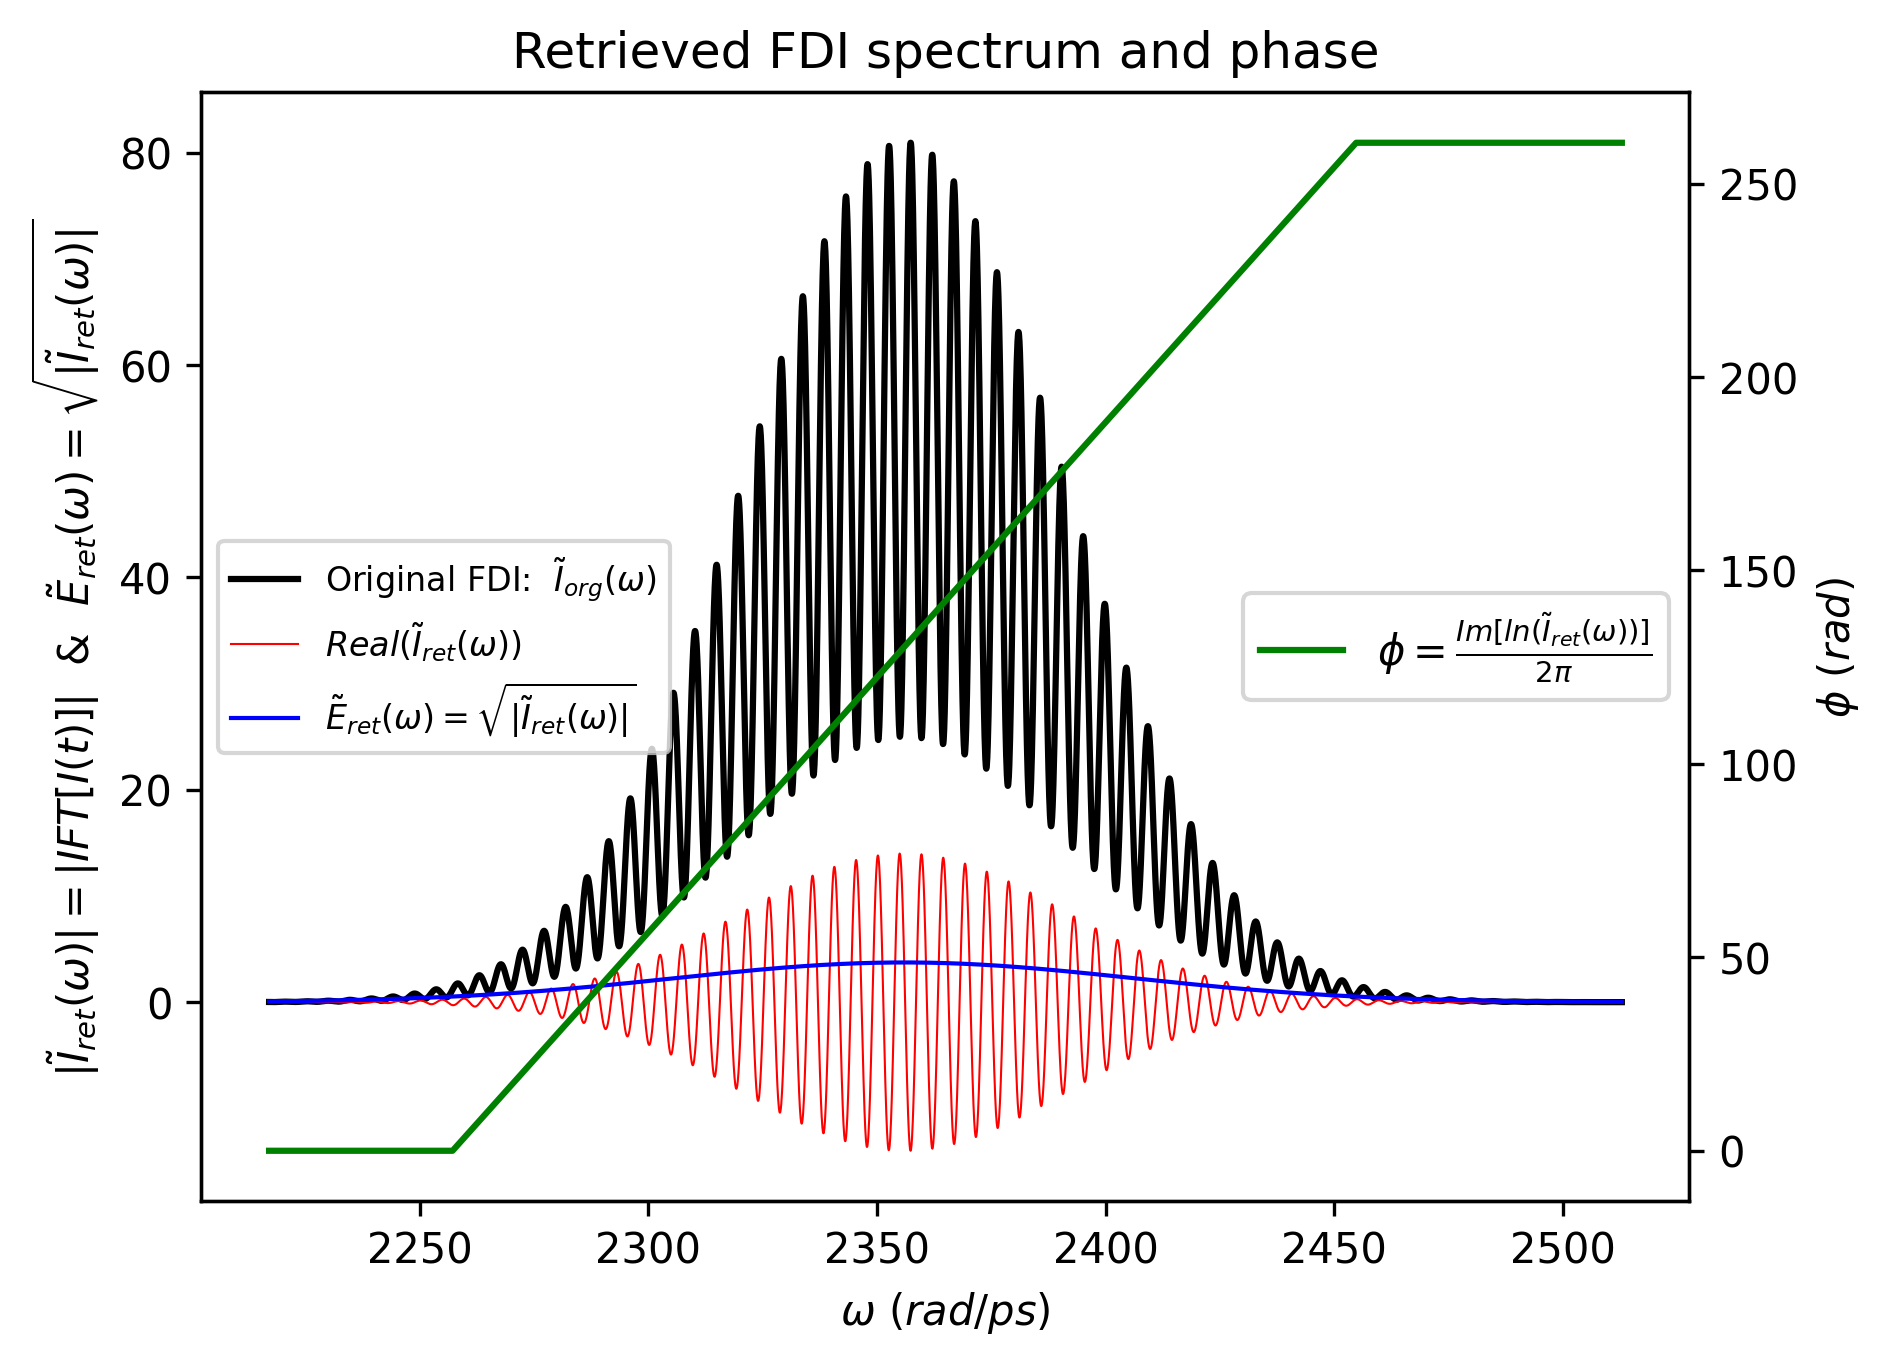

In [65]:
# Doing the IFFT of the right side-peak of the time domain to get back the frequency domain information

dt=abs(np.diff(time)[0])
I_omega_retrieved = np.fft.ifft(np.fft.fftshift(I_t_right_peak))
omega_retrieved = np.fft.fftshift(np.fft.fftfreq(len(I_t), dt))

omega_offset = pulse1.omega[0]
omega_retrieved = omega_retrieved + omega_offset - omega_retrieved[0]
omega_retrieved = (omega_retrieved-omega_retrieved[0])*(pulse1.omega[-1]-pulse1.omega[0])/(omega_retrieved[-1]-omega_retrieved[0]) + pulse1.omega[0]

E_omega_retrieved = np.sqrt(abs(I_omega_retrieved))

phase_retrieved = (+1)*(np.log(I_omega_retrieved)).imag
phase_retrieved=np.unwrap(phase_retrieved)

def make_noisy_phase_zero(phase_array,I_array,maxpercent):
    denoised_array=np.copy(phase_array)
    denoised_array[0]=0
    maxvar=max([abs(max(I_array)),abs(min(I_array))])
    jump=[]
    for i in range(1,len(phase_array)):
        if(abs(I_array[i])/maxvar <=maxpercent):
            #denoised_array[i]=0
            denoised_array[i]=denoised_array[i-1]
        else:
            jump.append(denoised_array[i]-denoised_array[i-1])
            denoised_array[i]-=jump[0]
    
    return denoised_array

phase_retrieved=make_noisy_phase_zero(phase_retrieved,abs(I_omega_retrieved),maxpercent=0.02)
#phase_retrieved /= 2*np.pi

pulse_retrieved = E_omega_retrieved*np.exp(1j*phase_retrieved)

minw = find_index(pulse1.omega,2217) 
maxw = find_index(pulse1.omega,2513)

fig, ax = plt.subplots(dpi=300)

ax.plot(omega_retrieved[minw:maxw],combined_I[minw:maxw],'k-',label="Original FDI:  "+r"$\tilde I_{org}(\omega)$")
ax.plot(omega_retrieved[minw:maxw],(I_omega_retrieved[minw:maxw]).real,"r-",label=r"$Real(\tilde I_{ret}(\omega))$",lw=0.5)
ax.plot(omega_retrieved[minw:maxw],abs(pulse_retrieved[minw:maxw]),"b-",label=r"$\tilde E_{ret}(\omega)=\sqrt{|\tilde I_{ret}(\omega)|}$",lw=1)
#ax.plot(omega_retrieved[minw:maxw],(abs(I_omega_retrieved)-combined_I)[minw:maxw],'m--',label=r"$\mathcal{E}=|\tilde I_{ret}(\omega)|-\tilde I_{org}(\omega)}$",lw=1)
ax.legend(loc="center left", fontsize=8)
ax.set_title("Retrieved FDI spectrum and phase")
ax.set_xlabel(r"$\omega\ (rad/ps)$")
ax.set_ylabel(r"$|\tilde I_{ret}(\omega)|=|IFT[I(t)]|\ \ &\ \ \tilde E_{ret}(\omega)=\sqrt{|\tilde I_{ret}(\omega)|}$",fontname="Times New Roman")

bx = ax.twinx()
bx.plot(omega_retrieved[minw:maxw],phase_retrieved[minw:maxw],"g-",label=r"$\phi=\frac{Im[ln(\tilde I_{ret}(\omega))]}{2\pi}$",lw=1.5)
bx.legend(loc="center right")#, bbox_to_anchor=(0.125, 0.6), bbox_transform=plt.gcf().transFigure)
bx.set_ylabel(r"$\phi\ (rad)$")

plt.show()

[ 1.31791821e+00 -2.97472261e+03]
[ 8.98519129e-18  1.31791821e+00 -2.97472261e+03]


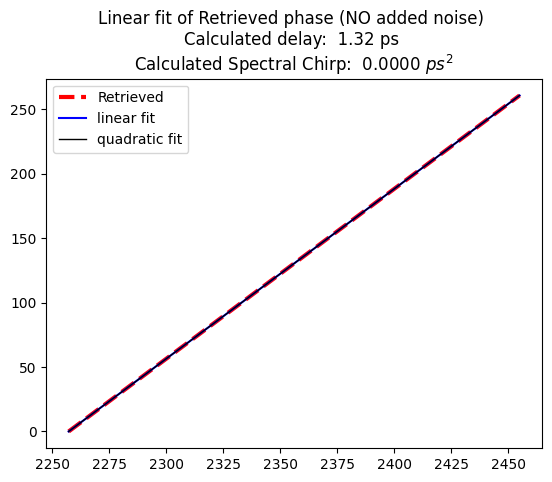

In [66]:
# Fitting the phase linearly to get the delay between two pulses

def find_step_start(data):
    for i in range(1, len(data)):
        if data[i] != data[i - 1]:
            return i - 1  # Return the index of the start value
    return None  # Return None if there are no changes in the data

minw = find_step_start(phase_retrieved) 
maxw = len(phase_retrieved)-find_step_start(phase_retrieved[::-1]) 


phase_linefit,parameters_linefit=linefit(omega_retrieved[minw:maxw],phase_retrieved[minw:maxw])
print(parameters_linefit)


phase_quadfit,parameters_quadfit=parabola_fit(omega_retrieved[minw:maxw],phase_retrieved[minw:maxw])
print(parameters_quadfit)


plt.plot(omega_retrieved[minw:maxw],phase_retrieved[minw:maxw],'r--',label="Retrieved",lw=3)
plt.plot(omega_retrieved[minw:maxw],phase_linefit,'b-',label="linear fit")
plt.plot(omega_retrieved[minw:maxw],phase_quadfit,'k-',label="quadratic fit",lw=1)
plt.title(f"Linear fit of Retrieved phase (NO added noise) \nCalculated delay: {parameters_linefit[0]: .2f} ps \nCalculated Spectral Chirp: {parameters_quadfit[0]: .4f}"+r" $ps^2$")
plt.legend()
plt.show()

Adding Random noise before initial FFT to get noised I(t) and then doing IFFT to generate I($\omega$) again

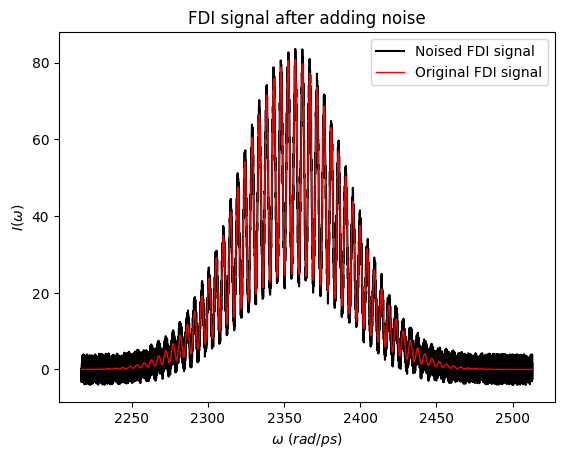

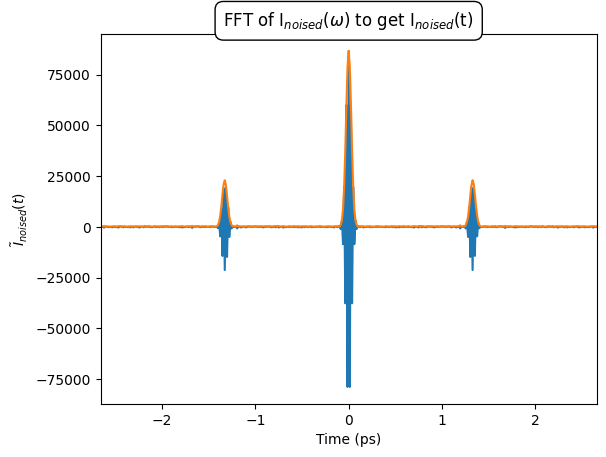

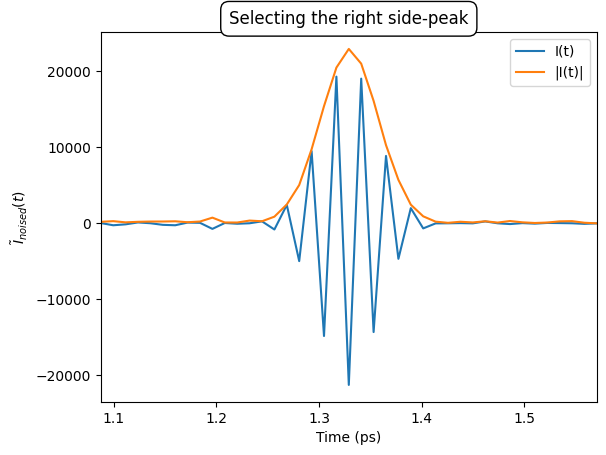

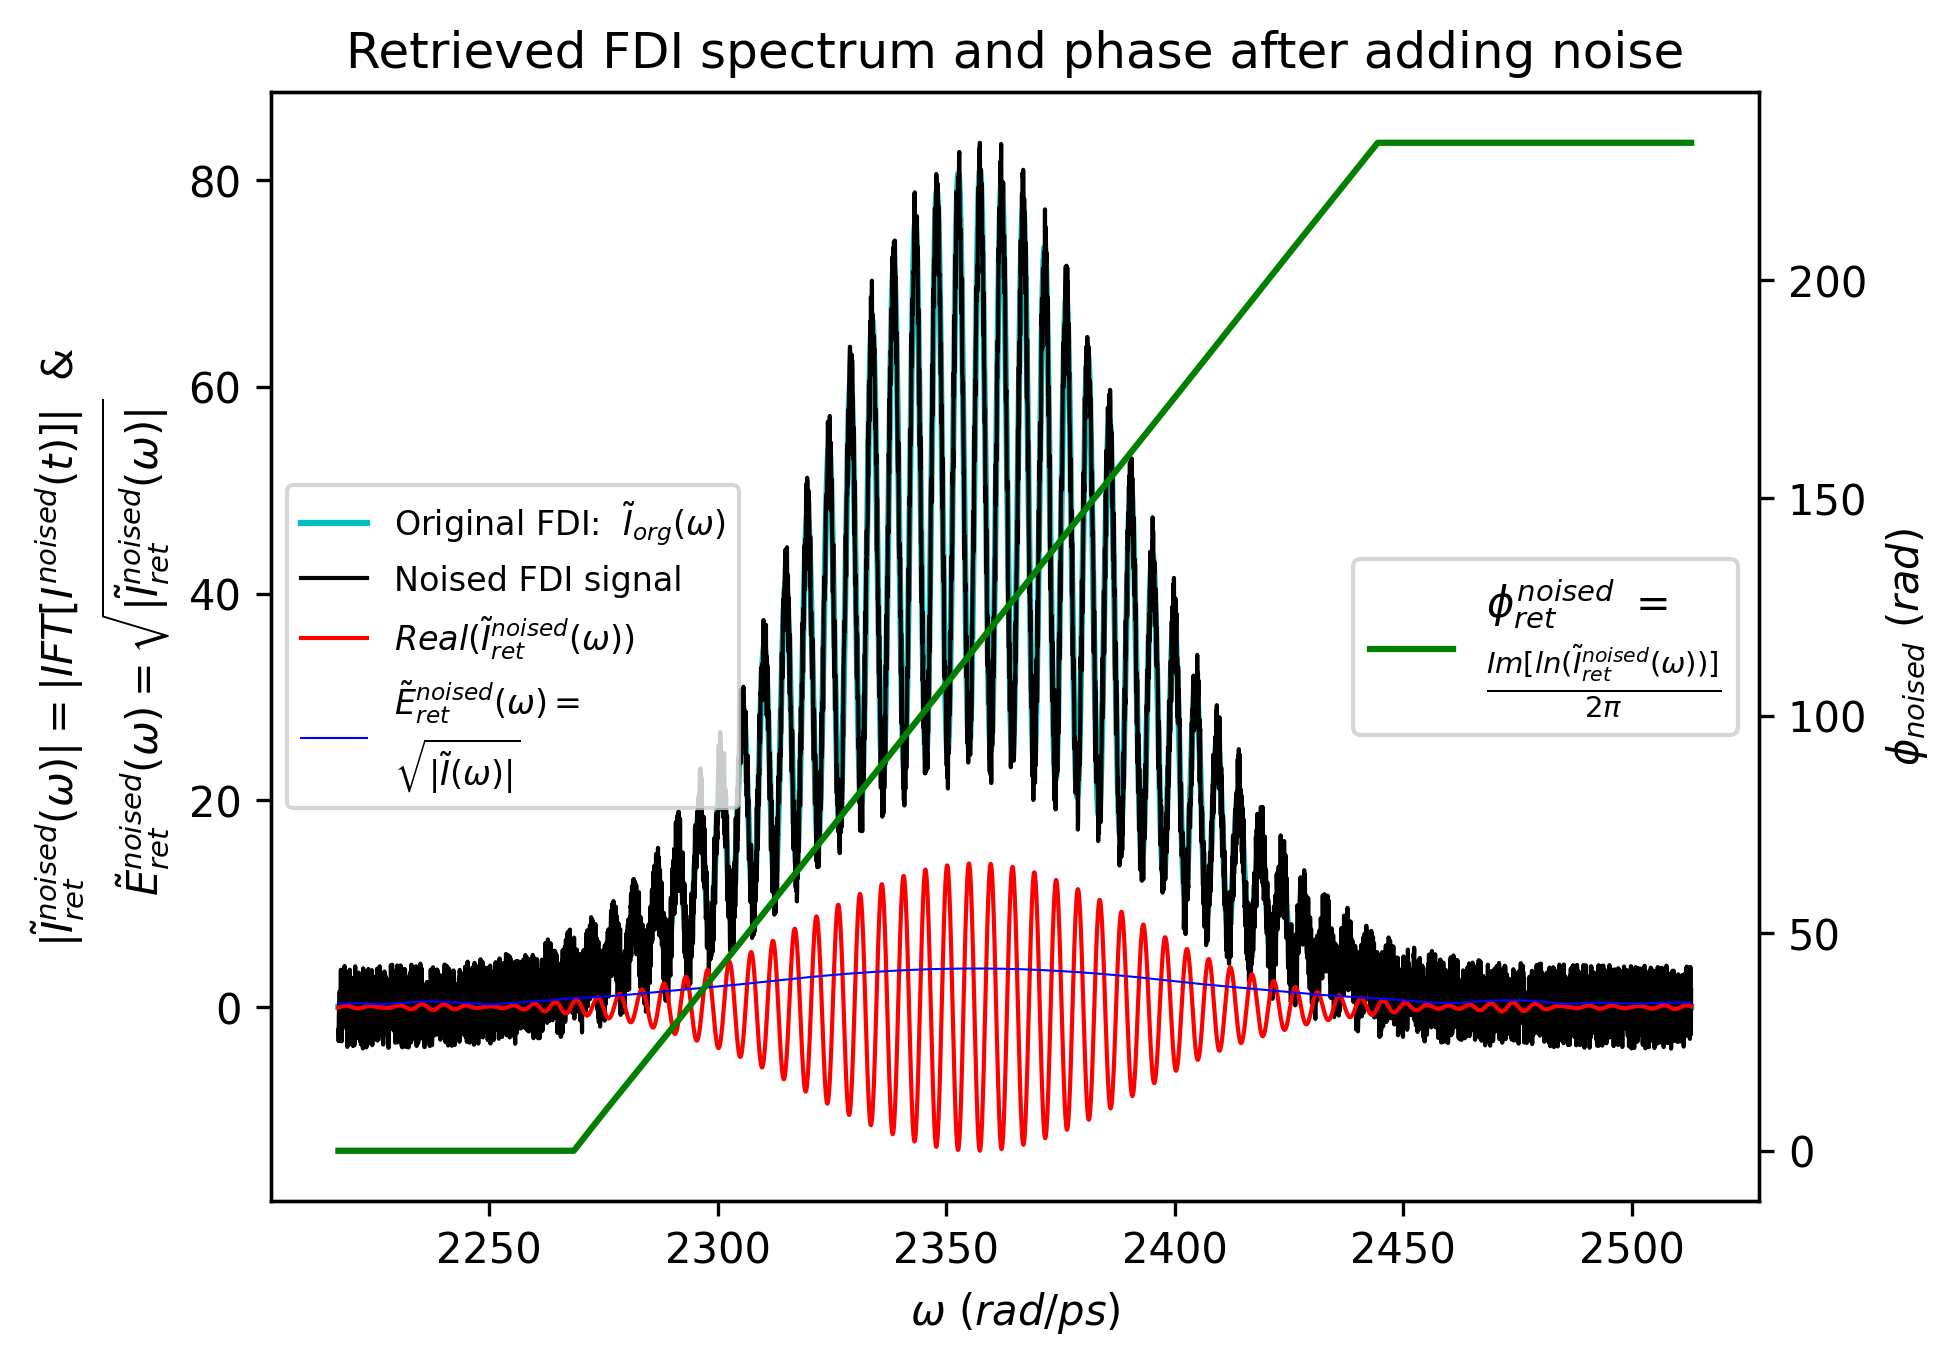

In [67]:
# generate random noise and add it to the FDI signal

noise=np.random.uniform(low=-np.max(combined_I)/20,high=np.max(combined_I)/20,size=len(combined_I))
combined_I_noised = combined_I+noise

minw = find_index(pulse1.omega,2217) 
maxw = find_index(pulse1.omega,2513)

plt.plot(omega_retrieved[minw:maxw],combined_I_noised[minw:maxw],'k-',label="Noised FDI signal")
plt.plot(omega_retrieved[minw:maxw],combined_I[minw:maxw],'r-',label="Original FDI signal",lw=1)
plt.title("FDI signal after adding noise")
plt.legend()
plt.xlabel(r"$\omega\ (rad/ps)$")
plt.ylabel(r"$I(\omega)$")
plt.show()


# Doing FFT of the noised FDI signal
I_t_noised  = np.fft.fftshift(np.fft.fft(combined_I_noised))

plt.plot(time,I_t_noised)
plt.plot(time,abs(I_t_noised))
plt.title(r"FFT of I$_{noised}(\omega)$ to get I$_{noised}$(t)" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Time (ps)")
plt.ylabel(r"$\tilde{I}_{noised}(t)$")
plt.xlim(-2*time_delay,2*time_delay)
plt.show()

minw=find_index(time,time_delay) -  time_spread
maxw=find_index(time,time_delay) +  time_spread

I_t_right_peak_noised=mask_array_by_zero(I_t_noised,(0,minw),(maxw,len(I_t_noised)))

plt.plot(time,I_t_right_peak_noised,label="I(t)")
plt.plot(time,abs(I_t_right_peak_noised),label="|I(t)|")
plt.title(r"Selecting the right side-peak" , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Time (ps)")
plt.ylabel(r"$\tilde{I}_{noised}(t)$")
plt.xlim(time[minw],time[maxw])
plt.legend()
plt.show()

I_omega_retrieved_noised = np.fft.ifft(np.fft.fftshift(I_t_right_peak_noised))
E_omega_retrieved_noised = np.sqrt(abs(I_omega_retrieved_noised))

phase_retrieved_noised = (+1)*(np.log(I_omega_retrieved_noised)).imag
phase_retrieved_noised = np.unwrap(phase_retrieved_noised)
phase_retrieved_noised = make_noisy_phase_zero(phase_retrieved_noised,abs(I_omega_retrieved_noised),maxpercent=0.05)
#phase_retrieved_noised /= 2*np.pi

pulse_retrieved_noised = E_omega_retrieved_noised*np.exp(1j*phase_retrieved_noised)

minw = find_index(pulse1.omega,2217) 
maxw = find_index(pulse1.omega,2513)


fig, ax = plt.subplots(dpi=300)

ax.plot(omega_retrieved[minw:maxw],combined_I[minw:maxw],'c-',label="Original FDI:  "+r"$\tilde I_{org}(\omega)$")
ax.plot(omega_retrieved[minw:maxw],combined_I_noised[minw:maxw],'k-',label="Noised FDI signal",lw=1)
ax.plot(omega_retrieved[minw:maxw],(I_omega_retrieved_noised[minw:maxw]).real,"r-",label=r"$Real(\tilde I^{noised}_{ret}(\omega))$",lw=1)
ax.plot(omega_retrieved[minw:maxw],abs(pulse_retrieved_noised[minw:maxw]),"b-",label=r"$\tilde E^{noised}_{ret}(\omega) =$"+"\n"+r"$\sqrt{|\tilde I(\omega)|}$",lw=0.5)
#ax.plot(omega_retrieved[minw:maxw],(abs(I_omega_retrieved_noised)-combined_I)[minw:maxw],'m--',label=r"$\mathcal{E}=|\tilde I_{ret}^{noised}(\omega)|-\tilde I_{org}(\omega)}$",lw=1)
ax.legend(loc="center left",fontsize=8)
ax.set_title("Retrieved FDI spectrum and phase after adding noise")
ax.set_xlabel(r"$\omega\ (rad/ps)$")
ax.set_ylabel(r"$|\tilde I^{noised}_{ret}(\omega)|=|IFT[I^{noised}(t)]|\ \ &$"+"\n"+r"$\tilde E^{noised}_{ret}(\omega)=\sqrt{|\tilde I^{noised}_{ret}(\omega)|}$",fontname="Times New Roman")

bx = ax.twinx()
bx.plot(omega_retrieved[minw:maxw],phase_retrieved_noised[minw:maxw],"g-",label=r"$\phi^{noised}_{ret}\ =$"+"\n"+r"$\frac{Im[ln(\tilde I^{noised}_{ret}(\omega))]}{2\pi}$",lw=1.5)
bx.legend(loc="center right")#, bbox_to_anchor=(0.125, 0.6), bbox_transform=plt.gcf().transFigure)
bx.set_ylabel(r"$\phi_{noised}\ (rad)$")

plt.show()

[ 1.31745586e+00 -2.98874157e+03]
[ 1.53220901e-05  1.24524431e+00 -2.90369958e+03]


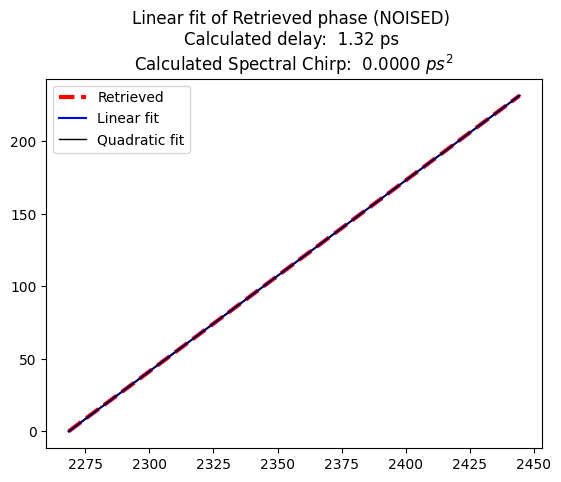

In [68]:
# Fitting the retrieved phase for noised data 

minw = find_step_start(phase_retrieved_noised) 
maxw = len(phase_retrieved_noised)-find_step_start(phase_retrieved_noised[::-1]) 


phase_linefit_noised,parameters_linefit_noised=linefit(omega_retrieved[minw:maxw],phase_retrieved_noised[minw:maxw])
print(parameters_linefit_noised)

phase_quadfit_noised,parameters_quadfit_noised=parabola_fit(omega_retrieved[minw:maxw],phase_retrieved_noised[minw:maxw])
print(parameters_quadfit_noised)

plt.plot(omega_retrieved[minw:maxw],phase_retrieved_noised[minw:maxw],'r--',label="Retrieved",lw=3)
plt.plot(omega_retrieved[minw:maxw],phase_linefit_noised,'b-',label="Linear fit")
plt.plot(omega_retrieved[minw:maxw],phase_quadfit_noised,'k-',label="Quadratic fit",lw=1)
plt.title(f"Linear fit of Retrieved phase (NOISED) \nCalculated delay: {parameters_linefit_noised[0]: .2f} ps \nCalculated Spectral Chirp: {parameters_quadfit_noised[0]: .4f}"+r" $ps^2$")
plt.legend()
plt.show()
